<a href="https://colab.research.google.com/github/muhammadalfateh6/Muhammad_Alfateh_Work/blob/main/DL_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from dataclasses import replace
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
import tensorflow as tf
from tensorflow import keras

data1 = pd.read_csv('hddd.csv')
data= data1.drop(columns=['AgeCategory'])

for column in data:
    print(f'{column} : {data[column].unique()}')

HeartDisease : ['No' 'Yes']
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : ['No' 'Yes']
Sex : ['Female' 'Male']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : ['Yes' 'No']
KidneyDisease : ['No' 'Yes']
SkinCancer : ['Yes' 'No']


In [ ]:
def cat_columns():
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column} : {data[column].unique()}')

In [ ]:
yes_no_columns= ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

In [ ]:
data.replace({'Female': 0, 'Male': 1}, inplace=True)
data.replace({'White': 0.2, 'Black': 0.4, 'Asian': 0.6, 'American Indian/Alaskan Native': 0.8,'Hispanic': 0.9, 'Other': 1 }, inplace=True)
data.replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'}, inplace=True)
data.replace({'Poor': 0.2, 'Fair': 0.4,'Good': 0.6,'Very good': 0.8,'Excellent':1 }, inplace=True)
data.replace({'Yes': 1, 'No': 0})

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,0.2,1,1,0.8,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,0.2,0,1,0.8,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,0.2,1,1,0.4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0.2,0,0,0.6,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,0.2,0,1,0.8,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0.9,1,0,0.4,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,0.9,0,1,0.8,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,0.9,0,1,0.6,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0.9,0,0,0.6,12.0,0,0,0


In [ ]:
for col in yes_no_columns:
    data[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
for column in data:
    print(f'{column} : {data[column].unique()}')

HeartDisease : [0 1]
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : [1 0]
AlcoholDrinking : [0 1]
Stroke : [0 1]
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : [0 1]
Sex : [0 1]
Race : [0.2 0.4 0.6 0.8 1.  0.9]
Diabetic : [1 0]
PhysicalActivity : [1 0]
GenHealth : [0.8 0.4 0.6 0.2 1. ]
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : [1 0]
KidneyDisease : [0 1]
SkinCancer : [1 0]


In [ ]:
scale_columns = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
scaler = MinMaxScaler()
data[scale_columns] = scaler.fit_transform(data[scale_columns])
 
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,0.2,1,1,0.8,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,0.2,0,1,0.8,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,0.2,1,1,0.4,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,0.2,0,0,0.6,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,0.2,0,1,0.8,0.304348,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,1,0.9,1,0,0.4,0.217391,1,0,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,1,0.9,0,1,0.8,0.173913,1,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,0,0.9,0,1,0.6,0.217391,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,0,0.9,0,0,0.6,0.478261,0,0,0


In [ ]:
x =data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [ ]:
model = keras.Sequential([
    keras.layers.Dense(68, input_shape=(16,), activation= 'sigmoid'),
    keras.layers.Dense(34, activation='sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid')
])
keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history= model.fit(x_train, y_train, epochs=100)

Epoch 1/100
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2395 - accuracy: 0.9161
Epoch 2/100
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2395 - accuracy: 0.9159
Epoch 3/100
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2395 - accuracy: 0.9160
Epoch 4/100
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2394 - accuracy: 0.9159
Epoch 5/100
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2393 - accuracy: 0.9159
Epoch 6/100
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2394 - accuracy: 0.9161
Epoch 7/100
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2393 - accuracy: 0.9160
Epoch 8/100
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2393 - accuracy: 0.9160
Epoch 9/100
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2393 - accuracy: 0.9162
Epoch 10/100
7995/7995 [==============================] - 19s 2m

In [ ]:
prediction = model.predict(x_test)

1999/1999 [==============================] - 3s 1ms/step


In [ ]:
model.evaluate(x_test, y_test)

1999/1999 [==============================] - 4s 2ms/step - loss: 0.2392 - accuracy: 0.9166


[0.23916193842887878, 0.9166184663772583]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, prediction)

ValueError: ignored

In [ ]:
history.history

{'loss': [0.23947365581989288,
  0.2395007610321045,
  0.23945166170597076,
  0.2394460290670395,
  0.23933443427085876,
  0.23939840495586395,
  0.23928603529930115,
  0.23931293189525604,
  0.23926487565040588,
  0.23922492563724518,
  0.23918598890304565,
  0.23917993903160095,
  0.23917627334594727,
  0.23911377787590027,
  0.23909787833690643,
  0.23907727003097534,
  0.2390640377998352,
  0.23904336988925934,
  0.23895137012004852,
  0.23898738622665405,
  0.2388893961906433,
  0.23892906308174133,
  0.2388630509376526,
  0.23888449370861053,
  0.23877201974391937,
  0.23879557847976685,
  0.2387409210205078,
  0.2387414425611496,
  0.23867318034172058,
  0.23863060772418976,
  0.238617405295372,
  0.23857595026493073,
  0.2385713905096054,
  0.23855730891227722,
  0.23849472403526306,
  0.23848961293697357,
  0.23849700391292572,
  0.23845846951007843,
  0.23844186961650848,
  0.23833905160427094,
  0.23831681907176971,
  0.2382785975933075,
  0.2383187860250473,
  0.23823770880

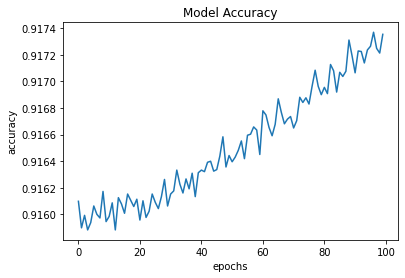

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.show()

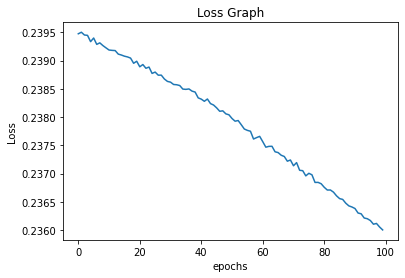

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('epochs')

plt.show()

KeyError: ignored

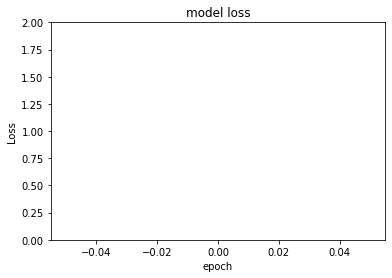

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
#plt.style.use('fivethirtyeight')
#plt.xkcd()
plt.title('model loss')
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.ylim([0,2])
plt.plot(hist["loss"],color='b')
plt.plot(hist["val_loss"],color='g')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plot_Loss.png')

plt.figure()
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.ylim([0,1])
plt.plot(hist["accuracy"],color='b')
plt.plot(hist["val_accuracy"],color='g')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plot_accuracy.png')


In [ ]:
history.history

{'loss': [0.24094443023204803],
 'accuracy': [0.9160047769546509],
 'lr': [0.001]}

In [ ]:
prediction = model.predict(x_test)
model.evaluate(x_test, y_test)

1999/1999 [==============================] - 3s 1ms/step - loss: 0.2432 - accuracy: 0.9156


[0.24322089552879333, 0.9155709147453308]

In [ ]:
history.history.keys()
val_acc = history.history['val_acc']

KeyError: ignored

KeyError: ignored

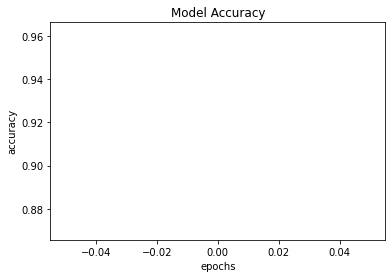

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.plot(history.history['val_accuracy'],color='g')
plt.legend(['Training' , 'Testing'], loc='upper left')


plt.show()

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy using 32 filters, dropout and .001 Adam learning rate')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss using 32 filters, dropout and .001 Adam learning rate')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()


AttributeError: ignored

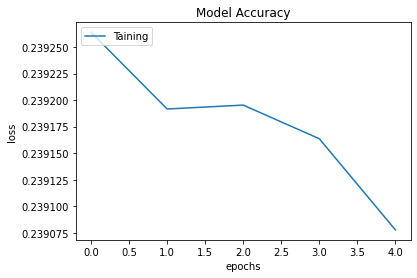

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Taining'], loc='upper left')
plt.show()